<h1>MAGIC for single cell RNA-seq</h1>

This notebook details the usage of MAGIC for single cell RNA-seq data.

<h4>Table of contents</h4>
<br/>
<a href='#intro'>Introduction</a>
<br/>
<a href='#data'>Loading data</a>
<br/>
<a href='#pre'>Data preprocessing</a>
<br/>
<a href='#magic'>Running MAGIC</a>
<br/>
<a href='#magic2'>Visualizing MAGIC-ed data</a>

<a id="data"></a><h2> Loading data </h2>

MAGIC can read single cell RNA-seq data from a csv or sparse mtx file. The csv file contains cells in the rows and genes in the columns. First step is to import the package. The following code snippet imports the `magic` package along with other plotting related imports

In [1]:
import magic

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

The data can be loaded using the `magic.mg.SCData.from_csv` or `magic.mg.SCData.from_mtx` functions. 

In [2]:
# Load single-cell RNA-seq data
scdata = magic.mg.SCData.from_csv(os.path.expanduser('../BMMC_myeloid.csv'),
                                  data_type='sc-seq', normalize=False)


This will create an object of the type `magic.mg.SCData` which is the base class for the analysis.

<a id='pca'></a>A summary of the `scdata` object is shown below

In [3]:
scdata

SCData: 2730 cells x 27297 genes

data_prefix=True
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
magic=None
metadata=True
normalized=True
pca=None
tsne=None

This shows that the data matrix contains `2730` cells and `27297` genes along with the different properties of the `magic.mg.SCData` class.

The `scdata` object can also be initialized using a `pandas DataFrame`. An example is shown below <br/>
<code>
scdata = magic.mg.SCData(df, 'sc-seq')
</code>

<a id='pre'></a><h2>Data preprocessing</h2>

<h4> Normalize data </h4>

Next, we will normalize the data by dividing each cell by its molecule count and multiplying the counts of cells by the median of the molecule counts.

In [4]:
scdata = scdata.normalize_scseq_data()

<h4> Saving SCData object </h4>

The `SCData` object can be saved to a pickle file and loaded using the `save` and `load` functions.
<code>
scdata.save('scdata.p')
scdata = magic.mg.SCdata.load('scdata.p')
</code>

<a id="magic"></a><h2> Running MAGIC </h2>

Before running MAGIC, a PCA plot showing the percent of variance explained by the top PCA components can be used to choose the number of PCA components to include when running MAGIC.

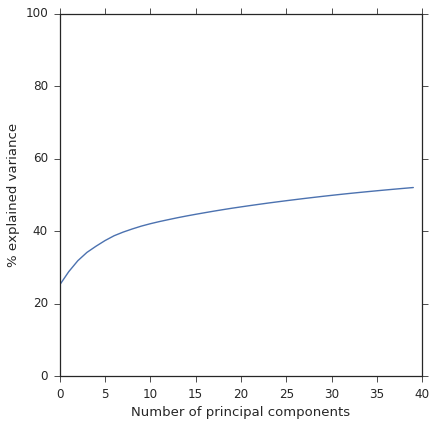

In [6]:
fig, ax = scdata.plot_pca_variance_explained(n_components=40, random=True)

When running MAGIC, a number of parameters can be specified. If a value for 't' is not specified, the optimal value will be calculated.

doing PCA
Computing distances
Autotuning distances
Computing kernel
computing optimal t
optimal t =  5
MAGIC: W_t = W^t
MAGIC: data_new = W_t * data


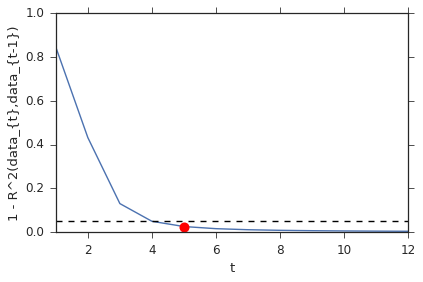

In [7]:
# MAGIC
scdata.run_magic(n_pca_components=20, random_pca=True, t=None, compute_t_make_plots=True, 
                 t_max=12, compute_t_n_genes=500, k=30, 
                 ka=10, epsilon=1, rescale_percent=99)

<a id="magic2"></a><h2> Visualizations </h2>

After running MAGIC, imputed gene expression can be visualized in a number of ways, including gene-gene scatter plots, PCA scatter plots, and tSNE scatter plots. 

<h3> Gene-gene scatter plots </h3>

<h4>2D scatter plot before MAGIC:</h4>

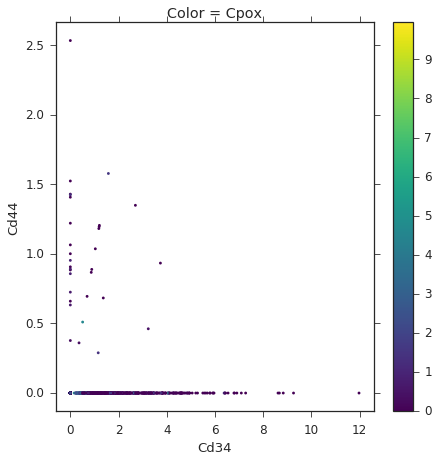

In [34]:
fig, ax = scdata.scatter_gene_expression(['Cd34', 'Cd14'], color='Cpox')
ax.set_xlabel('Cd34')
ax.set_ylabel('Cd44')

<h4>2D scatter plot after MAGIC:</h4>

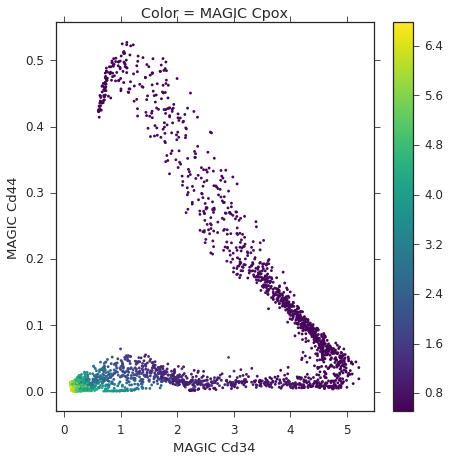

In [33]:
fig, ax = scdata.magic.scatter_gene_expression(['MAGIC Cd34', 'MAGIC Cd14'], color ='MAGIC Cpox')
ax.set_xlabel('MAGIC Cd34')
ax.set_ylabel('MAGIC Cd44')

<h4>3D scatter plot before MAGIC:</h4>

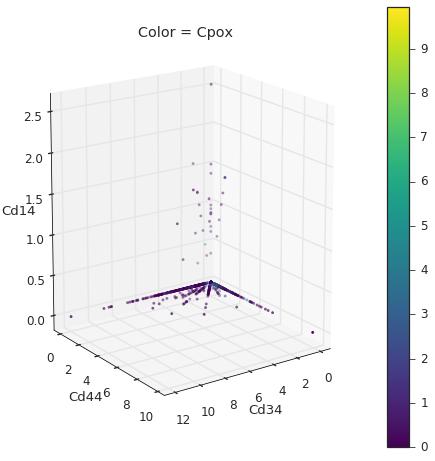

In [40]:
fig, ax = scdata.scatter_gene_expression(['Cd34', 'Cd44', 'Cd14'], color='Cpox')
ax.set_xlabel('Cd34')
ax.set_ylabel('Cd44')
ax.set_zlabel('Cd14')

<h4>3D scatter plot after MAGIC:</h4>

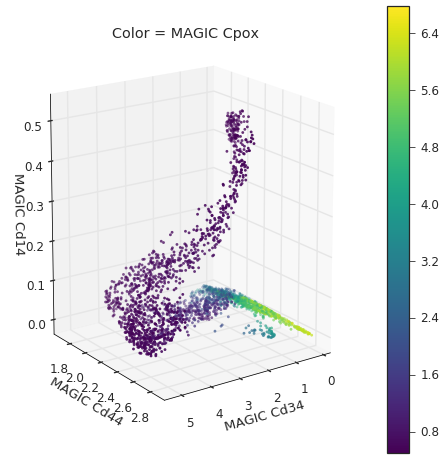

In [41]:
fig, ax = scdata.magic.scatter_gene_expression(['MAGIC Cd34', 'MAGIC Cd44', 'MAGIC Cd14'], color='MAGIC Cpox')
ax.set_xlabel('MAGIC Cd34')
ax.set_ylabel('MAGIC Cd44')
ax.set_zlabel('MAGIC Cd14')

<h3>PCA scatter plots</h3>

In [42]:
scdata.run_pca()

In [43]:
scdata.magic.run_pca()

<h4>PC2 vs PC3 colored by CDH1, VIM, FN1 and ZEB1 (before MAGIC):</h4>

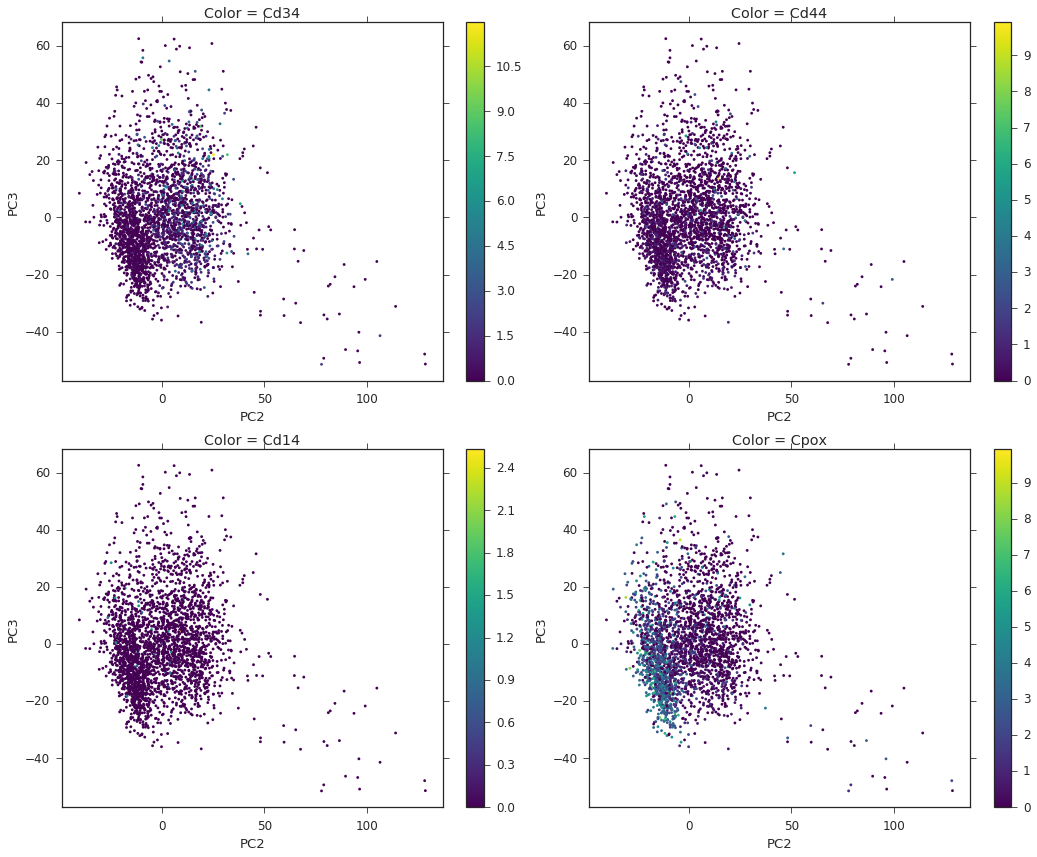

In [44]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=[15, 12])
genes = ['Cd34', 'Cd44', 'Cd14', 'Cpox']
for i in range(len(genes)):
    ax = fig.add_subplot(gs[i//2, i%2])
    scdata.scatter_gene_expression(genes=['PC2', 'PC3'], color=genes[i], fig=fig, ax=ax)

<h4> PC2 vs PC3 colored by CDH1, VIM, FN1, and ZEB1 (after MAGIC):</h4>

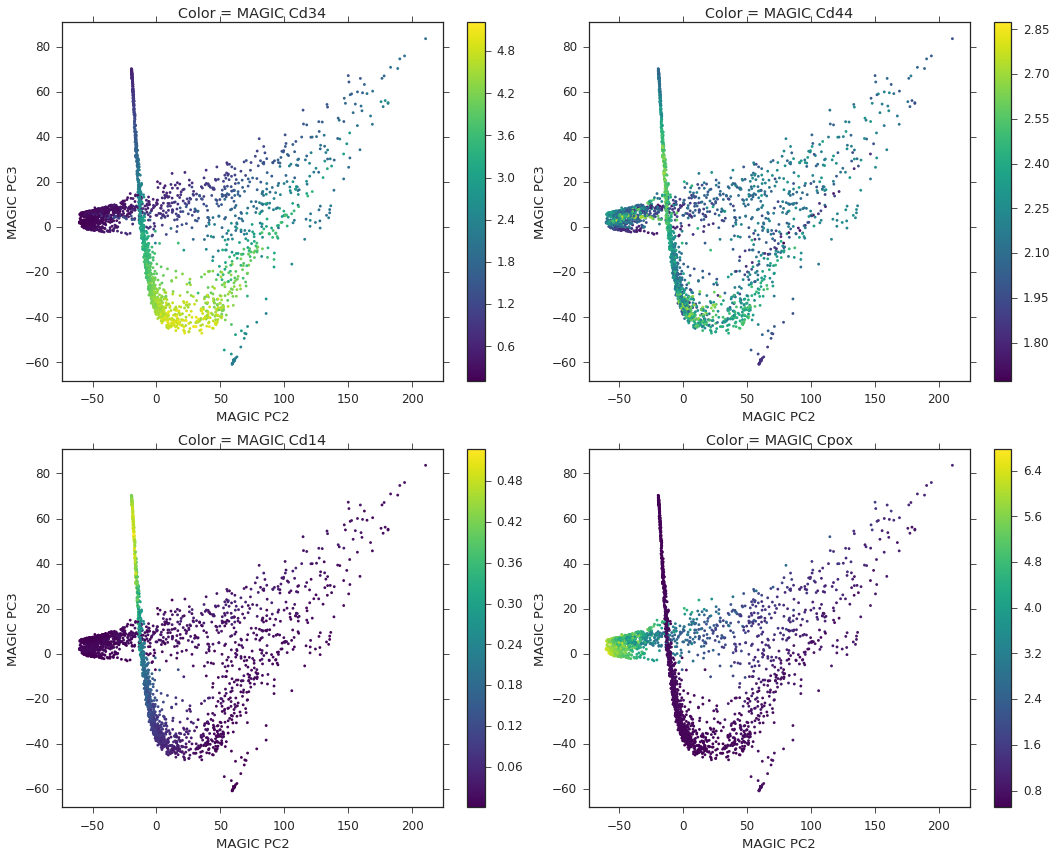

In [45]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=[15, 12])
genes = ['MAGIC Cd34', 'MAGIC Cd44', 'MAGIC Cd14', 'MAGIC Cpox']
for i in range(len(genes)):
    ax = fig.add_subplot(gs[i//2, i%2])
    scdata.magic.scatter_gene_expression(genes=['MAGIC PC2', 'MAGIC PC3'], color=genes[i], fig=fig, ax=ax)



<h3>tSNE scatter plots</h3>

In [46]:
scdata.run_tsne()

<h4>tSNE maps colored by CDH1, VIM, FN1, and ZEB1 (before MAGIC):</h4>

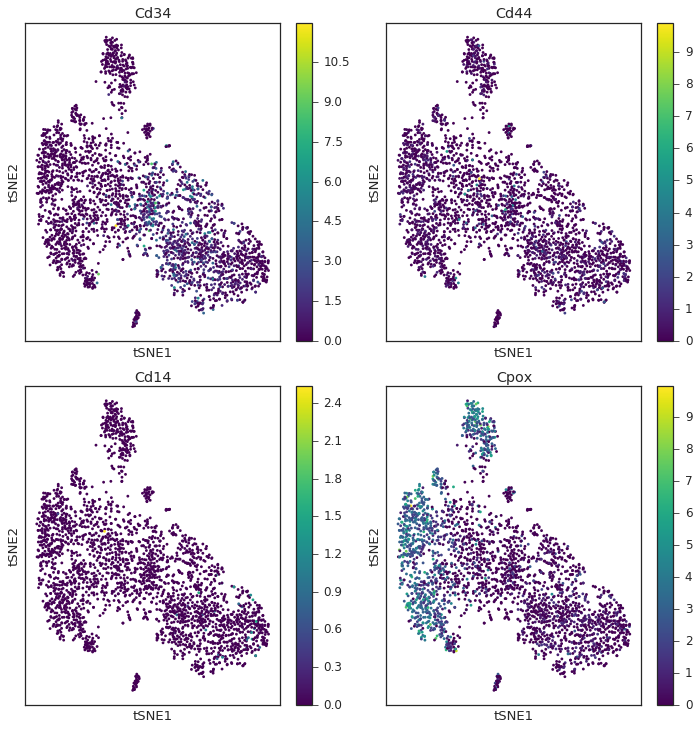

In [47]:
fig, ax = scdata.plot_gene_expression(genes=['Cd34', 'Cd44', 'Cd14', 'Cpox'])

<h4>tSNE maps colored by CDH1, FN1, VIM, and ZEB1 (after MAGIC):</h4>

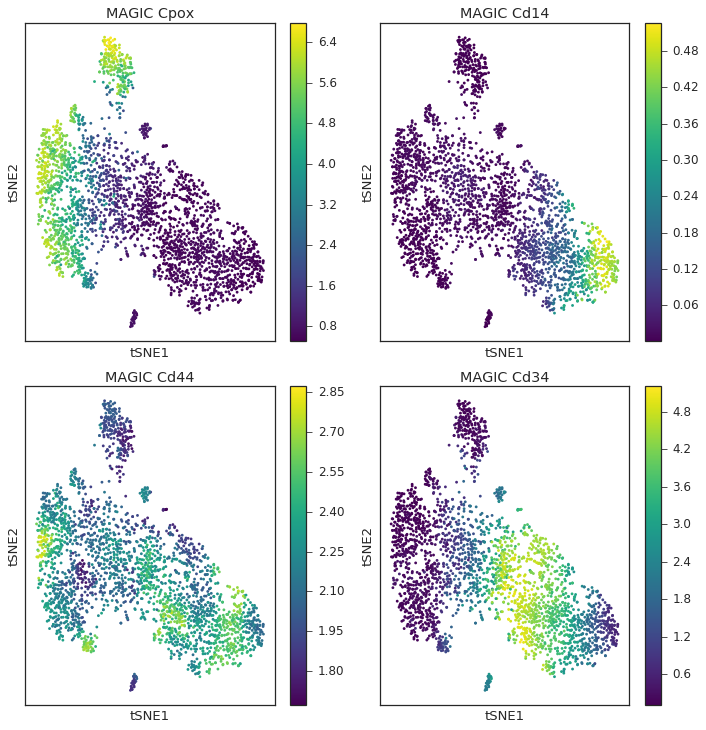

In [48]:
colors = {'MAGIC Cd34': scdata.magic.data['MAGIC Cd34'],
          'MAGIC Cd44': scdata.magic.data['MAGIC Cd44'],
          'MAGIC Cd14': scdata.magic.data['MAGIC Cd14'],
          'MAGIC Cpox': scdata.magic.data['MAGIC Cpox']}
fix, ax = scdata.plot_gene_expression(genes=colors)